# Whatsapp Analyzer

This jupyter notebook is used to analyze whatsapp chat. Just for fun ;)

## Import Libraries

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from parse import *

## Define an Avatar Class

In [2]:
class Avatar:
  def __init__(self, name):
    self.name = name
    self.dictionary = {}
    self.nb_chat_sent = 0;
    self.key_words = []

  def myfunc(self):
    print("Hello my name is " + self.name)
    
  def printDict(self):
    print(self.name + "'s dictionary: ")
    print(self.dictionary)
    
  def printNbOfMessage(self):
    print("Number of message sent by " + self.name + " : " + str(self.nb_chat_sent))

## Define Functions

In [3]:
def build_dict_of_word(message, dictionary):
    parsed_message = message.split(" ")

    for word in parsed_message:
        if (word == 'unu'):
            word = 'nu'

        if (word not in list_of_neglected_words):
            build_dict(word, dictionary)
                
def build_dict(keys, dictionary):
    if(keys not in dictionary.keys()):
        dictionary[keys] = 1
    else:
        dictionary[keys] += 1
    

def by_hour_list_day(date, list_of_date, keys, dictionary):
    #if date is in list of date
    #add counter
    #else append the value list
    #add counter
    
    date_counter
    nb_of_chat_per_day = 0;
    
    if(date not in list_of_date):
        dictionary[keys] 
    if(keys not in dictionary.keys()):
        dictionary[keys] = 1
    else:
        dictionary[keys] += 1
        
def sort_dict_by_key(dictionary):
    sorted_dict = {}
    for i in sorted (dictionary): 
        sorted_dict[i] = dictionary[i]
    
    return sorted_dict

def sort_dict_by_value(dictionary):
    return sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

## Load Messages from Text File

In [4]:
f = open('ChatWithSry.txt', 'r', encoding="utf8")
content = f.read()
#print(content)
f.close()

## Initialize Variables

In [5]:
#init name
my_name = "Fazlur Rahman"
partner_name = "Sry Handini Puteri"

#instantiate person
person1 = Avatar(my_name)
person2 = Avatar(partner_name)

#initialize empty list and string
chats = []
chat = ""

#init list of neglected words
list_of_neglected_words = ['<media', 'omitted>', 'di', 'yang', 'ba', 'nya', 'ini']

#init counter
nb_of_days = 0
nb_sent_by_day = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0} 

#init dict, nb of chat per day
list_of_date = []
dict_nb_of_chat_per_day = {}
dict_nb_of_chat_by_hour = {}

dict_per_day_per_hour = {}
dict_nb_of_chat_by_hour_per_day = {}


## Extract Data

In [6]:
for i in range (len(content)):
    chat = chat + content[i]
    if (content[i] == "\n"):
        chats.append(chat)

        r = parse("{}, {} - {}: {}", chat)
        
        if (r is not None):
            date = r[0]
            hour_min = r[1]
            sender = r[2]
            message = r[3].lower()
            
            if (date not in dict_nb_of_chat_per_day.keys()):
                nb_of_days += 1
                
            build_dict(date, dict_nb_of_chat_per_day);
            
            hour = hour_min.split(":")[0]
            min = hour_min.split(":")[1]
            
            build_dict(hour, dict_nb_of_chat_by_hour)
            build_dict(hour, dict_nb_of_chat_by_hour_per_day)
            
            if (date not in dict_per_day_per_hour.keys()):
                dict_per_day_per_hour[date] = dict_nb_of_chat_by_hour_per_day
                dict_nb_of_chat_by_hour_per_day = {}
                
                
            if (sender == person1.name):
                person1.nb_chat_sent += 1
                build_dict_of_word(message, person1.dictionary)
                        
            elif (sender == person2.name):
                person2.nb_chat_sent += 1
                build_dict_of_word(message, person2.dictionary)
                
        chat = ""
        
last_chat = chats[len(chats)-1]
print(last_chat)
r = parse("{}, {} - {}: {}", last_chat)

6/5/20, 23:36 - Sry Handini Puteri: sudah malaaaaam



## Process Data

In [7]:
#get average nb of chat by hour
dict_nb_of_chat_by_hour = {k: v / total for total in (nb_of_days,) for k, v in dict_nb_of_chat_by_hour.items()}
dict_nb_of_chat_by_hour = sort_dict_by_key(dict_nb_of_chat_by_hour)


#sort person's dictionary by value
person1.dictionary = sort_dict_by_value(person1.dictionary)
person2.dictionary = sort_dict_by_value(person2.dictionary)

dict_list_per_hour = {}

#print(dict_per_day_per_hour)
for date_item in dict_per_day_per_hour.keys():
    for hour in dict_per_day_per_hour[date_item].keys():
        if hour not in dict_list_per_hour.keys():
            dict_list_per_hour[hour] = []
            dict_list_per_hour[hour].append(dict_per_day_per_hour[date_item][hour])
        else:
            dict_list_per_hour[hour].append(dict_per_day_per_hour[date_item][hour])
            
dict_list_per_hour = sort_dict_by_key(dict_list_per_hour)
#print(dict_list_per_hour)

# Calculate the average
list_by_hour = []

for key in dict_list_per_hour.keys():
    array = np.array(dict_list_per_hour[key])
    list_by_hour.append(array)
    
average_by_hour = []
std_by_hour = []

for element in list_by_hour:
    average_by_hour.append(np.sum(element)/nb_of_days)
    std_by_hour.append(np.std(element))
    
hours = dict_nb_of_chat_by_hour.keys()
x_pos = np.arange(len(hours))
CTEs = average_by_hour
error = std_by_hour

## Plot Number of Message Sent

Number of message sent by Fazlur Rahman : 21525
Number of message sent by Sry Handini Puteri : 18474


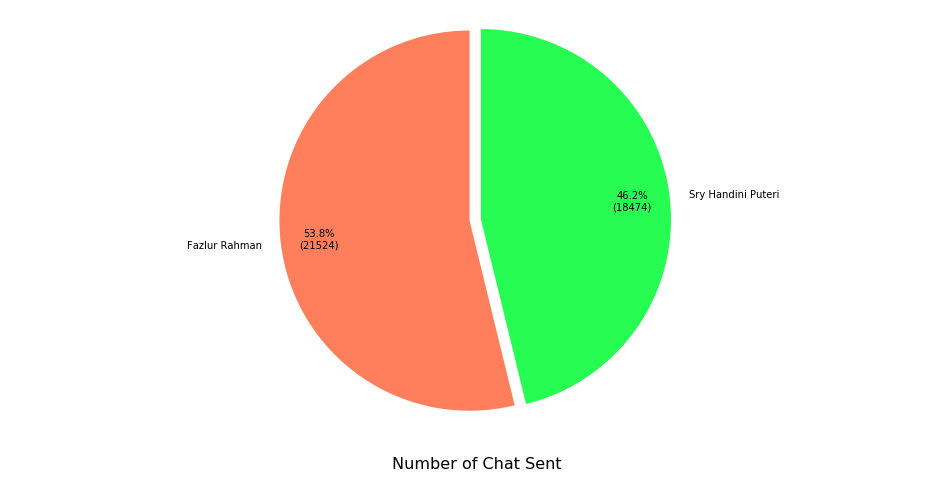

In [8]:
person1.printNbOfMessage()
person2.printNbOfMessage()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = person1.name, person2.name
sizes = [person1.nb_chat_sent, person2.nb_chat_sent]
explode = (0.05, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['#ff7f5c','#26fc51','#f2e207']

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
plt.title('Number of Chat Sent', fontsize=16, y = -0.1)
ax1.axis('equal')
plt.tight_layout()
plt.show()

## Plot Average Message Sent

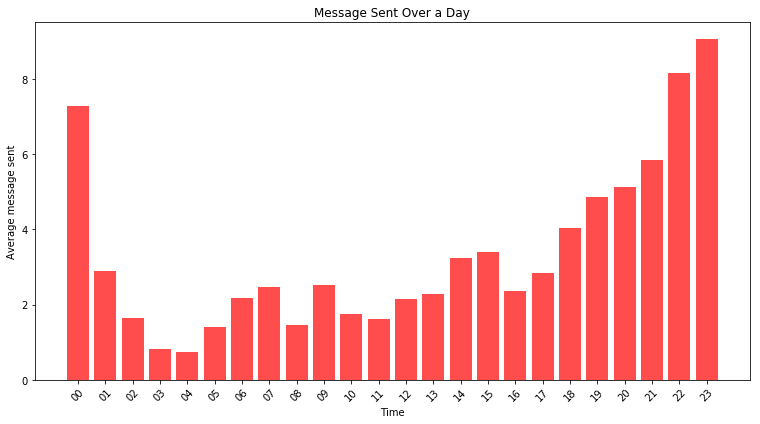

In [24]:
fig, ax = plt.subplots()
ax.bar(x_pos, average_by_hour, color ='r', alpha = 0.7)
plt.xticks(x_pos, hours, rotation=45)
plt.ylabel('Average message sent')
plt.xlabel('Time')
plt.title('Message Sent Over a Day')
plt.gcf().set_size_inches(w=16/1.5,h=9/1.5)
plt.tight_layout()
plt.show()


## Frequently Used Word

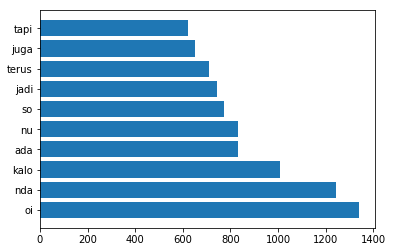

In [46]:
key_words = []
nb_of_usage = []

person1.key_words = []
person2.key_words = []

for i in range(10):
    person1.key_words.append((person1.dictionary[i][0], person1.dictionary[i][1]))
    person2.key_words.append((person2.dictionary[i][0], person2.dictionary[i][1]))
    
#print(person2.key_words)
labels1 = []
data1 = []
labels2 = []
data2 = []

for i in range(10):
    labels1.append(person1.key_words[i][0])
    data1.append(person1.key_words[i][1])
    
    labels2.append(person2.key_words[i][0])
    data2.append(person2.key_words[i][1])

# Make fake dataset
y_pos1 = np.arange(len(labels1))
y_pos2 = np.arange(len(labels2))

# Create horizontal bars
plot1 = plt.barh(y_pos1, data1)

# Create names on the y-axis
plt.yticks(y_pos1, labels1)

# Show graphic
plt.show()

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(y_pos1, data1)
axs[1].plot(y_pos1, data1)